# 0. Requirements and Imports

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install folium

You should consider upgrading via the 'C:\Users\Admin\Desktop\watershed_challenge\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Admin\Desktop\watershed_challenge\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Admin\Desktop\watershed_challenge\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Admin\Desktop\watershed_challenge\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import folium
from folium.plugins import MarkerCluster


sns.set()
pd.set_option('mode.chained_assignment', None)

# 1. Load Data

In [3]:
data = pd.read_csv(os.path.join('data', 'flux.csv'))

# 2. Exploratory Data Analysis

## 2.1 Basic dataframe exploration

In [4]:
data.shape

(4180480, 10)

In [5]:
data.columns

Index(['date', 'basin_id', 'flux', 'precip', 'temp_max', 'gauge_name', 'lat',
       'lon', 'mean_elev', 'area_km2'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180480 entries, 0 to 4180479
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   date        object 
 1   basin_id    int64  
 2   flux        float64
 3   precip      float64
 4   temp_max    float64
 5   gauge_name  object 
 6   lat         float64
 7   lon         float64
 8   mean_elev   float64
 9   area_km2    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 318.9+ MB


In [7]:
data.head()

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2
0,1980-01-01,1001001,0.579,0.0,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
1,1980-01-02,1001001,0.543,0.0,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
2,1980-01-03,1001001,0.482,0.0,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
3,1980-01-04,1001001,0.459,0.0,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
4,1980-01-05,1001001,0.436,0.0,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859


In [8]:
data.describe()

,basin_id,flux,precip,temp_max,lat,lon,mean_elev,area_km2
count,4.180480e+06,4.180480e+06,4.175037e+06,4.175037e+06,4.180480e+06,4.180480e+06,4.180480e+06,4.180480e+06
mean,7.179757e+06,5.253340e+01,2.947445e+00,1.365728e+01,-3.569572e+01,-7.129595e+01,1.760129e+03,2.404876e+03
std,3.180965e+06,1.676027e+02,8.766749e+00,6.615037e+00,8.047659e+00,1.254339e+00,1.382121e+03,4.322051e+03
min,1.001001e+06,0.000000e+00,0.000000e+00,-1.160359e+01,-5.494690e+01,-7.366670e+01,1.181229e+02,1.789123e+01
25%,4.558001e+06,8.680000e-01,0.000000e+00,9.162867e+00,-3.915000e+01,-7.231670e+01,5.847012e+02,3.761001e+02
50%,7.350003e+06,5.171000e+00,0.000000e+00,1.321396e+01,-3.588420e+01,-7.137190e+01,1.195311e+03,8.205541e+02
75%,9.416001e+06,2.990000e+01,6.422626e-01,1.805745e+01,-3.126560e+01,-7.050670e+01,3.048161e+03,2.461610e+03
max,1.293000e+07,1.580500e+04,2.132120e+02,4.081117e+01,-1.784280e+01,-6.763920e+01,4.910152e+03,5.224367e+04


In [9]:
# Convert date from str to datetime object
data['date'] = pd.to_datetime(data['date'])
print(f"Data from {data['date'].min()} to {data['date'].max()}")
data.info()

Data from 1980-01-01 00:00:00 to 2020-06-06 00:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180480 entries, 0 to 4180479
Data columns (total 10 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date        datetime64[ns]
 1   basin_id    int64         
 2   flux        float64       
 3   precip      float64       
 4   temp_max    float64       
 5   gauge_name  object        
 6   lat         float64       
 7   lon         float64       
 8   mean_elev   float64       
 9   area_km2    float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 318.9+ MB


In [10]:
# Data per station
data_count_per_station = data.groupby(['basin_id', 'gauge_name']).size().reset_index(name='Count').sort_values(by=['Count'], ascending=False)
data_count_per_station

,basin_id,gauge_name,Count
150,5410002,Rio Aconcagua En Chacabuquito,14670
380,10134001,Rio Cruces En Rucaco,14649
120,4703002,Rio Choapa En Cuncumen,14639
88,4320001,Rio Elqui En Algarrobal,14634
354,9129002,Rio Cautin En Cajon,14603
...,...,...,...
203,6034001,Estero Chimbarongo En Santa Cruz,328
265,8117001,Rio Chillan En Longitudinal,302
111,4534001,Rio Pama Entrada Embalse Cogoti,195
159,5423002,Estero Las Vegas Aguas Abajo Canal Las Vegas,195


In [11]:
data_count_per_station.describe()

,basin_id,Count
count,5.030000e+02,503.000000
mean,7.320306e+06,8311.093439
std,3.207162e+06,4538.323348
min,1.001001e+06,175.000000
25%,4.715001e+06,4348.000000
50%,7.372001e+06,9003.000000
75%,1.012150e+07,12560.000000
max,1.293000e+07,14670.000000


## 2.2 Missing Data

### Missing dates

Since we eventually want to use a forecasting model, it's relevant to know if we have time leaps in the data.

In [12]:
dates = data.date.drop_duplicates()


def get_missing_dates(station_id: int, df: pd.DataFrame = data, ds: pd.Series = dates):
    """
    Get missing dates from a station with respect to the maximum date range of the dataset.
    :param station_id: Station ID
    :param df: Dataset
    :param ds: Unique dates of dataset
    :return: 
    """
    df_st = df.loc[data['basin_id'] == station_id, 'date']
    min_d = ds.min()
    max_d = ds.max()
    miss = pd.date_range(start=min_d, end=max_d).difference(df_st).to_series().reset_index(drop=True)
    miss = pd.DataFrame(miss, columns=['date'])
    miss['basin_id'] = station_id
    return miss



miss_dates = {}
for st_id in data['basin_id'].unique():
    miss_dates[st_id] = get_missing_dates(st_id)

In [13]:
missing_dates = pd.concat([md for md in miss_dates.values()], axis=0, ignore_index=True)
missing_dates.sort_values(by='date')

,date,basin_id
177282,1980-01-01,2103001
2424101,1980-01-01,10343001
1368960,1980-01-01,7308001
2774705,1980-01-01,11315001
1794019,1980-01-01,8312000
...,...,...
3171660,2020-06-06,12825002
1927067,2020-06-06,8351001
143282,2020-06-06,1730001
2895582,2020-06-06,11532000


In [14]:
missing_dates.groupby(by='date').count() # Number of stations missing a date

,basin_id
date,
1980-01-01,311
1980-01-02,312
1980-01-03,312
1980-01-04,310
1980-01-05,312
...,...
2020-06-02,338
2020-06-03,338
2020-06-04,339


In [15]:
missing_dates = pd.DataFrame(index=pd.date_range(start=data.date.min(), end=data.date.max()), columns=data.basin_id.unique())
for i in missing_dates.columns:
    missing_dates.loc[data.loc[data['basin_id'] == i, 'date'], i] = 1

dates_span = pd.DataFrame(index=pd.date_range(start=data.date.min(), end=data.date.max()), columns=data.basin_id.unique())
for i in missing_dates.columns:
    d = data.loc[data['basin_id'] == i, 'date']
    dates_span.loc[pd.date_range(d.min(), d.max()), i] = 1

In [16]:
missing_dates = missing_dates[missing_dates.isna().sum().sort_values().index.tolist()]
dates_span = dates_span[dates_span.isna().sum().sort_values().index.tolist()]
missing_dates

,5410002,10134001,4703002,4320001,9129002,9116001,9127001,5722002,4314002,9106001,...,4522001,4810006,8308000,5101002,5403003,6034001,8117001,5423002,4534001,10683002
1980-01-01,1,1,1,1,1,1,1,1,1,1,...,1,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
1980-01-02,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
1980-01-03,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
1980-01-04,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
1980-01-05,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02,1,1,1,1,1,1,NaN,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-03,1,1,1,1,1,1,NaN,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-04,1,1,1,1,1,1,NaN,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-05,1,1,1,1,1,1,NaN,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dates_span

,4721001,5748001,4503001,6013001,9101001,9129002,6027001,7359001,6028001,4320001,...,5221001,4810006,8115001,5101002,5403003,10683002,6034001,8117001,5423002,4534001
1980-01-01,1,1,1,1,1,1,1,1,1,1,...,1,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN
1980-01-02,1,1,1,1,1,1,1,1,1,1,...,1,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN
1980-01-03,1,1,1,1,1,1,1,1,1,1,...,1,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN
1980-01-04,1,1,1,1,1,1,1,1,1,1,...,1,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN
1980-01-05,1,1,1,1,1,1,1,1,1,1,...,1,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-03,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-04,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-05,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0.98, 'Date span for each station (minimum to maximum date).\n Red area indicates the interval for which a station has data.')

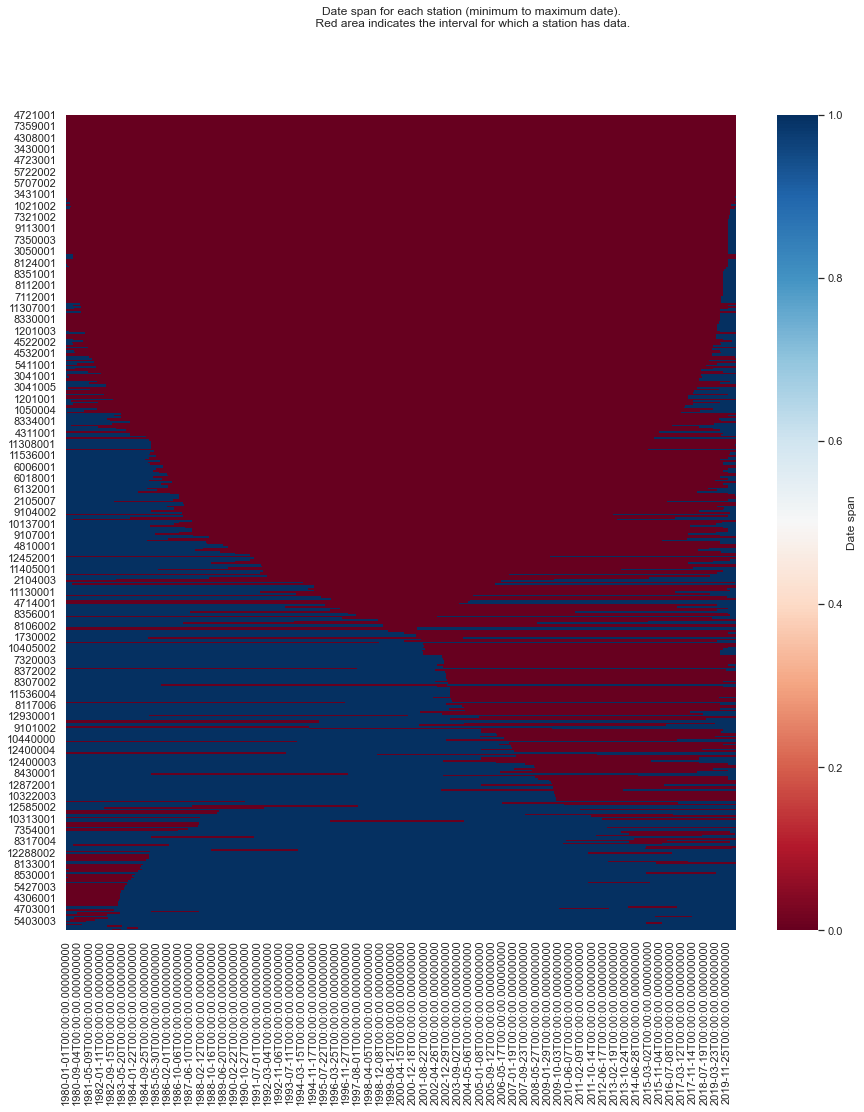

In [18]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(dates_span.isna().T,
            cmap="RdBu",
            cbar_kws={'label': 'Date span'})
fig.suptitle("Date span for each station (minimum to maximum date).\n Red area indicates the interval for which a station has data.")

Text(0.5, 0.98, 'Available data for each station by date. Blue area indicates missing data.')

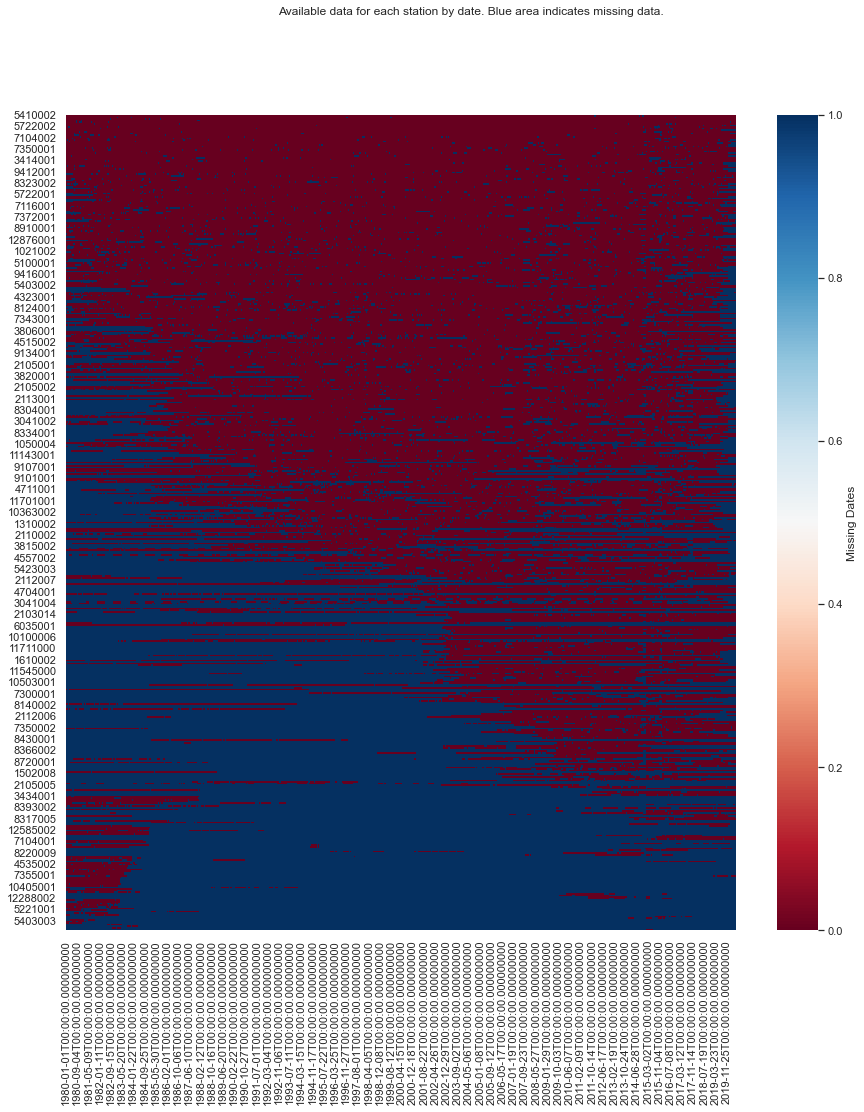

In [19]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(missing_dates.isna().T,
            cmap="RdBu",
            cbar_kws={'label': 'Missing Dates'})
fig.suptitle("Available data for each station by date. Blue area indicates missing data.")

### Nan

In [20]:
nan_rows = data[data.isnull().any(axis=1)]  # check rows with missing data
nan_rows

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2
60493,2020-05-06,1021001,1.707,NaN,NaN,Rio Lauca En Japu (O En El Limite),-18.5833,-69.0467,4493.855498,3277.980908
60494,2020-05-07,1021001,1.687,NaN,NaN,Rio Lauca En Japu (O En El Limite),-18.5833,-69.0467,4493.855498,3277.980908
60495,2020-05-08,1021001,1.698,NaN,NaN,Rio Lauca En Japu (O En El Limite),-18.5833,-69.0467,4493.855498,3277.980908
60496,2020-05-09,1021001,1.694,NaN,NaN,Rio Lauca En Japu (O En El Limite),-18.5833,-69.0467,4493.855498,3277.980908
60497,2020-05-10,1021001,1.690,NaN,NaN,Rio Lauca En Japu (O En El Limite),-18.5833,-69.0467,4493.855498,3277.980908
...,...,...,...,...,...,...,...,...,...,...
4180475,2020-06-02,12930001,0.375,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617
4180476,2020-06-03,12930001,0.342,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617
4180477,2020-06-04,12930001,0.325,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617
4180478,2020-06-05,12930001,0.311,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617


In [21]:
# Missing data by column
nan_rows.isna().sum(axis=0)

date             0
basin_id         0
flux             0
precip        5443
temp_max      5443
gauge_name       0
lat              0
lon              0
mean_elev        0
area_km2         0
dtype: int64

In [22]:
# Mising data by date
df_temp = nan_rows['date'].value_counts().sort_index()
print(len(df_temp))
df_temp

37


2020-05-01      4
2020-05-02      4
2020-05-03      4
2020-05-04      4
2020-05-05      4
2020-05-06    171
2020-05-07    172
2020-05-08    172
2020-05-09    172
2020-05-10    173
2020-05-11    172
2020-05-12    172
2020-05-13    173
2020-05-14    173
2020-05-15    173
2020-05-16    172
2020-05-17    173
2020-05-18    172
2020-05-19    172
2020-05-20    171
2020-05-21    168
2020-05-22    169
2020-05-23    169
2020-05-24    170
2020-05-25    170
2020-05-26    169
2020-05-27    169
2020-05-28    167
2020-05-29    168
2020-05-30    166
2020-05-31    165
2020-06-01    166
2020-06-02    165
2020-06-03    165
2020-06-04    164
2020-06-05    165
2020-06-06    165
Name: date, dtype: int64

Nan values belong to the last dates in the dataset

In [23]:
# Missing data by station
nan_data = data[data.isnull().any(axis=1)]['gauge_name'].value_counts().rename('nan_count')  # missing data by station
nan_stations = nan_data.index.tolist()
nan_data

Rio Maipo En Cabimbao                               37
Estero Yerba Loca Antes Junta San Francisco         37
Rio Itata En Paso Hondo                             37
Rio Biobio En Desembocadura                         34
Rio Lauca En Japu (O En El Limite)                  32
                                                    ..
Rio Huequecura Aguas Arriba De Embalse Angostura    22
Rio Maule En Longitudinal                           15
Rio Tolten En Coipue                                15
Rio Chamiza Ante Junta Rio Chico                    10
Rio Loa Antes Represa Lequena                        2
Name: nan_count, Length: 174, dtype: int64

- 174 out of 503 stations have rows with missing data
- Nan rows amount to the 0.13% of the complete dataset
- Over 90% of rows with nans have less than 1% rows with nans
- The maximum nan row percentage is ~2.5%
- 90 percentile of nan rows: 0.92
- Maximum percentage of nan rows: 2.61


,nan_percent
count,174.000000
mean,0.471407
std,0.364704
min,0.014611
25%,0.234370
50%,0.300761
75%,0.576120
max,2.614379


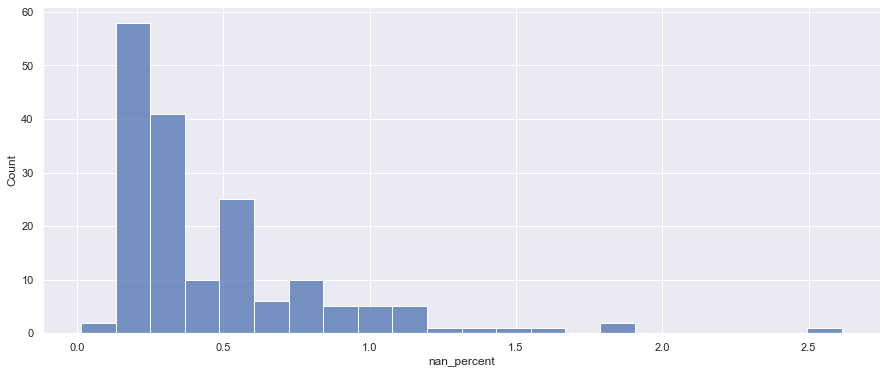

In [24]:
# Get % of missing values per station
data_count = data.loc[data['gauge_name'].isin(nan_stations), 'gauge_name'].value_counts().rename('count')
df_nan = pd.concat([data_count, nan_data], axis=1)
df_nan['nan_percent'] = df_nan['nan_count'] / df_nan['count'] * 100
plt.figure(figsize=((15, 6)))
sns.histplot(df_nan['nan_percent'], kde=False)

print(f"- {len(nan_stations)} out of {len(data['gauge_name'].unique())} stations have rows with missing data")
print(f"- Nan rows amount to the {len(nan_rows) / len(data) * 100:.2f}% of the complete dataset")
print(f"- Over 90% of rows with nans have less than 1% rows with nans")
print(f"- The maximum nan row percentage is ~2.5%")
print(f"- 90 percentile of nan rows: {df_nan['nan_percent'].quantile(.9):.2f}")
print(f"- Maximum percentage of nan rows: {df_nan['nan_percent'].max():.2f}")
df_nan[['nan_percent']].describe()

Missing values represent a really small sample compared to the dataset (<0.2%). When partitioning by station, 173 out of 503 have missing values where 90% of the stations have less than 1% missing values. The maximum missing values percentage is ~2.5%. Additionally, the missing data comes from the last dates of the dataset, so dropping them would not mean having time leaps in the data. Therefore it would not impact further analysis to drop the rows with missing values

In [25]:
data = data.dropna()

## 2.3 Column Data Distribution
### 2.3.1 Time dependent data
#### Flux

<AxesSubplot:xlabel='flux'>

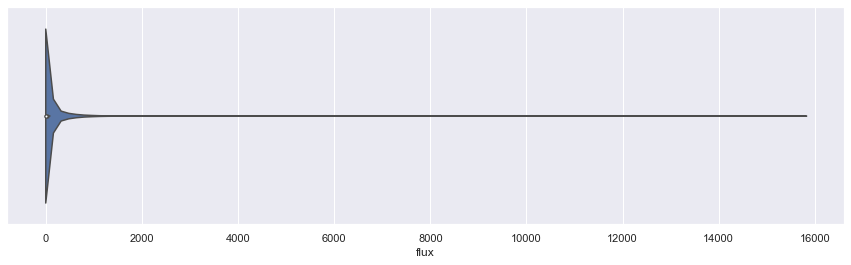

In [26]:
plt.figure(figsize=((15, 4)))
sns.violinplot(x=data['flux'])

Since flux has a large span we can plot the log distribution instead.

<AxesSubplot:xlabel='flux_log'>

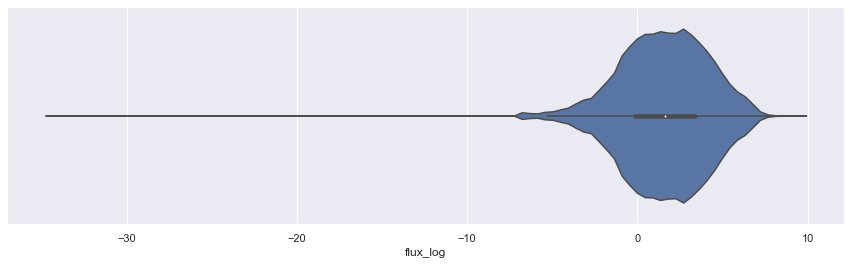

In [27]:
delta = 10 ** (-15)  # Avoids running into log(0)
data['flux_log'] = np.log(data['flux'] + delta)
plt.figure(figsize=((15, 4)))
sns.violinplot(x=data['flux_log'])

#### Average maximum temperature

<AxesSubplot:xlabel='temp_max'>

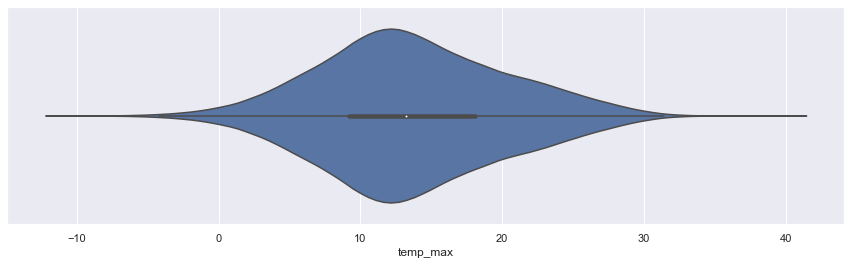

In [28]:
plt.figure(figsize=((15, 4)))
sns.violinplot(x=data['temp_max'])

#### Average precipitation

<AxesSubplot:xlabel='precip'>

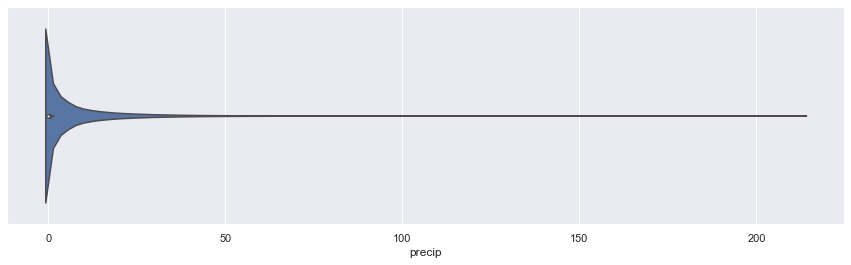

In [29]:
plt.figure(figsize=((15, 4)))
sns.violinplot(x=data['precip'])

Again, we can use the log of the variable to see more detail.

<AxesSubplot:xlabel='precip_log'>

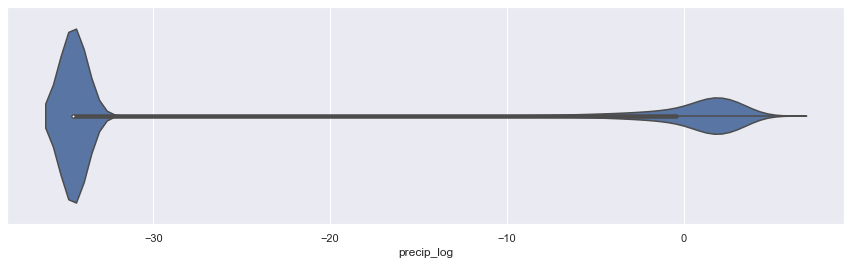

In [30]:
data['precip_log'] = np.log(data['precip'] + delta)
plt.figure(figsize=((15, 4)))
sns.violinplot(x=data['precip_log'])

We se an almost atomic value at zero precipitation, and the distribution when it does rain to the right. Let's see the second distribution on it's own.

<AxesSubplot:xlabel='precip_log'>

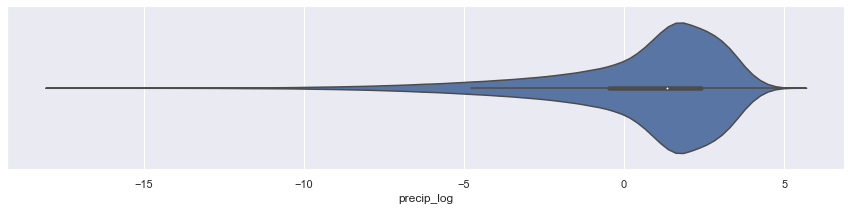

In [31]:
plt.figure(figsize=((15, 3)))
sns.violinplot(x=data.loc[data['precip_log'] > -20, 'precip_log'])

### 2.3.2 Station Information

#### Latitude and Longitude

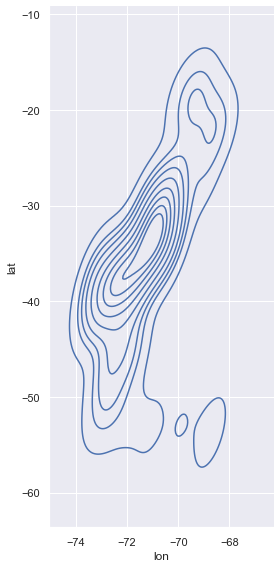

In [32]:
station_data = data[['gauge_name', 'lat', 'lon', 'mean_elev', 'area_km2']].drop_duplicates(subset=['lat', 'lon'])
sns.displot(station_data, x='lon', y='lat',kind='kde', height=8, aspect=.5)

In [33]:
# Get every station's data
def geoplot(df: pd.DataFrame = station_data) -> folium.Map:
    """
    Plot station's geographic data.
    :param df: Use to pass dataframe other than the original dataset.
    :return:Folium map object
    """
    pos_center = [-39, -70]  # Center position (roughly Chile's center)

    station_map = folium.Map(location=pos_center, tiles="Stamen Terrain", zoom_start=4)

    # cluster locations so map doesn't get cluttered
    marker_cluster = folium.plugins.MarkerCluster().add_to(station_map)

    # draw each station
    for i, row in df.iterrows():
        iframe = folium.IFrame(f"Gauge name: {row['gauge_name']} ({row['mean_elev']:.0f}m)")
        popup = folium.Popup(iframe, min_width=200, max_width=300)
        folium.Marker([row['lat'], row['lon']],
                      popup=popup,
                      icon=folium.Icon(icon='circle',
                                       prefix='fa')).add_to(marker_cluster)
    return station_map


geoplot()

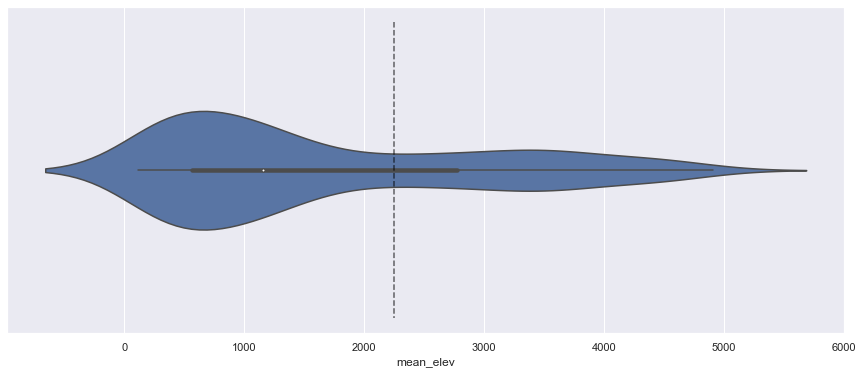

In [34]:
plt.figure(figsize=((15, 6)))
sns.violinplot(x=station_data['mean_elev'])
plt.vlines(2250, -1, 1, color='black', alpha=0.6, linestyle='--')

Bi-modal distribution, could help to split stations into high elevation and mid to sea-level elevation.

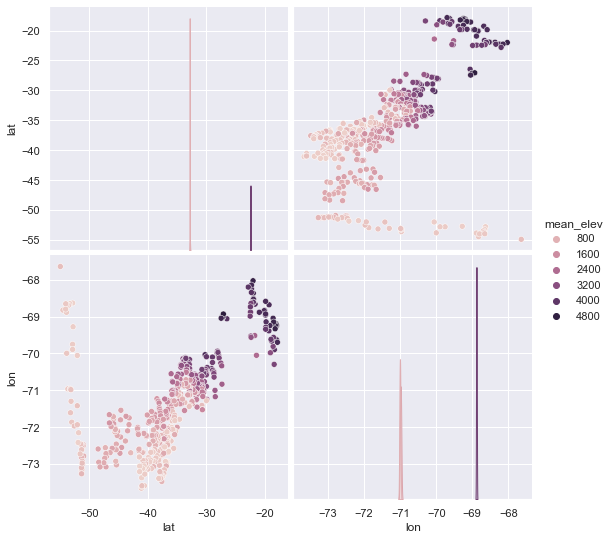

In [35]:
# correlate position with elevation
station_locs_3d = data[['lat', 'lon', 'mean_elev']].drop_duplicates(subset=['lat', 'lon'])
sns.pairplot(station_locs_3d, hue='mean_elev', height=3.8)

<AxesSubplot:xlabel='area_km2', ylabel='Count'>

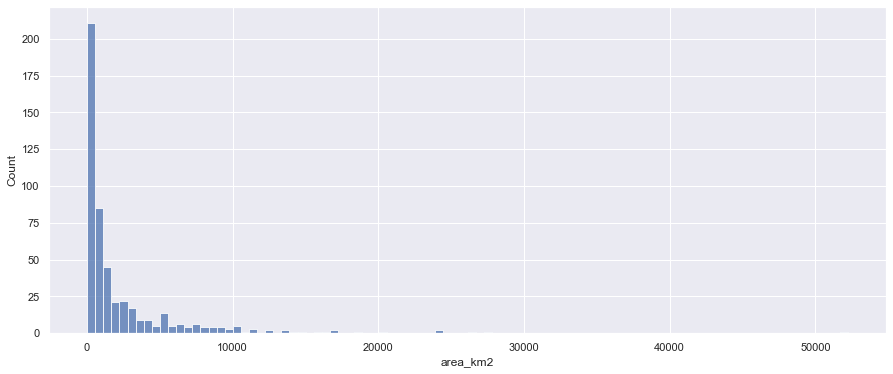

In [36]:
station_area = data[['lat', 'lon', 'area_km2']].drop_duplicates(subset=['lat', 'lon'])
plt.figure(figsize=((15, 6)))
sns.histplot(x=station_area['area_km2'])

### 2.3.3 Cluster stations

In [37]:
north_cond = -29 <= data['lat'] 
center_cond =  (-38 <= data['lat']) & (data['lat'] < -29)
south_cond = data['lat'] < -38

high_cond = data['mean_elev'] >= 2250
low_cond = ~high_cond

regions = {'north': north_cond,
           'center-high': center_cond & high_cond,
           'center-low': center_cond & low_cond,
           'south': south_cond}
data['region'] = ''
for k, v in regions.items():
    print(k, v.sum())
    data.loc[v, 'region'] = k
print(f"Min elevation in north data: {data[north_cond]['mean_elev'].min()}")
print(f"Max elevation in south data: {data[south_cond]['mean_elev'].max()}")
data

north 685555
center-high 759278
center-low 1348728
south 1381476
Min elevation in north data: 2429.88434948284
Max elevation in south data: 1618.22174119266


,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2,flux_log,precip_log,region
0,1980-01-01,1001001,0.579,0.000000,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,-0.546453,-34.538776,north
1,1980-01-02,1001001,0.543,0.000000,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,-0.610646,-34.538776,north
2,1980-01-03,1001001,0.482,0.000000,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,-0.729811,-34.538776,north
3,1980-01-04,1001001,0.459,0.000000,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,-0.778705,-34.538776,north
4,1980-01-05,1001001,0.436,0.000000,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,-0.830113,-34.538776,north
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180443,2020-04-25,12930001,0.431,0.000000,4.138484,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617,-0.841647,-34.538776,south
4180444,2020-04-26,12930001,0.362,0.000000,7.685259,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617,-1.016111,-34.538776,south
4180445,2020-04-27,12930001,0.342,0.000000,9.646850,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617,-1.072945,-34.538776,south
4180446,2020-04-28,12930001,0.359,0.000000,8.154713,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617,-1.024433,-34.538776,south


<AxesSubplot:xlabel='region', ylabel='flux_log'>

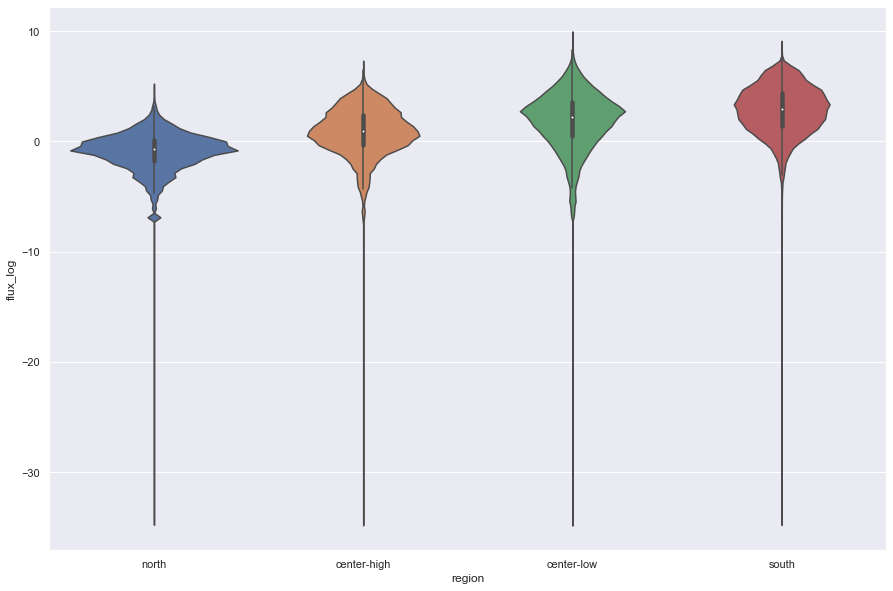

In [38]:
plt.figure(figsize=((15, 10)))
sns.violinplot(data=data, x='region', y='flux_log')

<AxesSubplot:xlabel='region', ylabel='temp_max'>

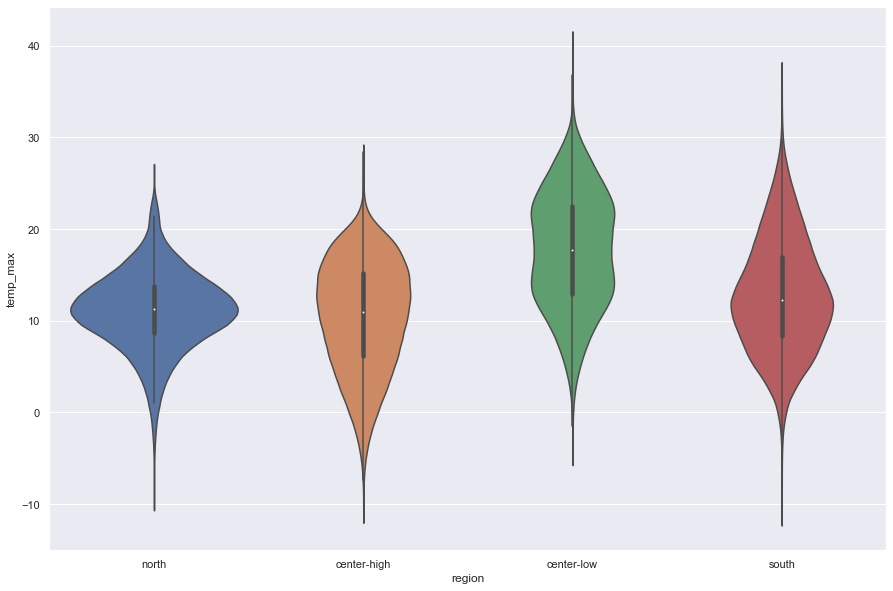

In [39]:
plt.figure(figsize=((15, 10)))
sns.violinplot(data=data, x='region', y='temp_max')

<AxesSubplot:xlabel='region', ylabel='precip_log'>

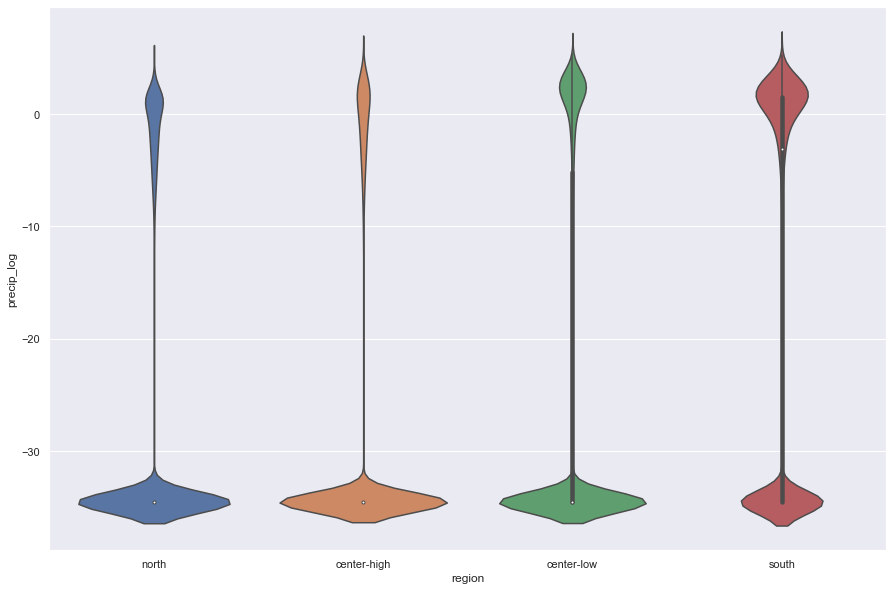

In [40]:
plt.figure(figsize=((15, 10)))
sns.violinplot(data=data, x='region', y='precip_log')

<AxesSubplot:xlabel='region', ylabel='precip_log'>

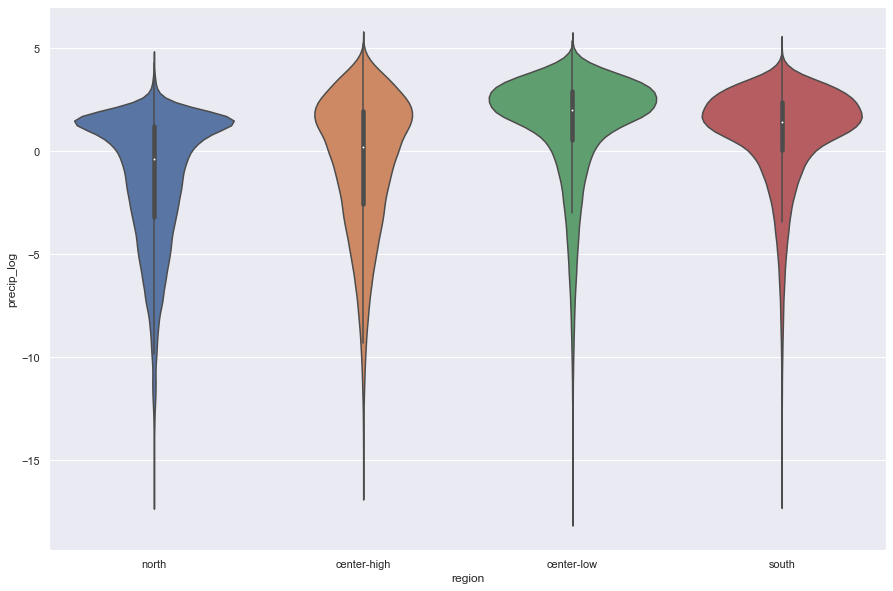

In [41]:
# show dist only when there is precipitation
plt.figure(figsize=((15, 10)))
sns.violinplot(data=data.loc[data['precip_log'] > -20], x='region', y='precip_log')